Learning rate: 0.1, Validation Accuracy: 59.13%
Learning rate: 0.01, Validation Accuracy: 55.65%
Learning rate: 0.001, Validation Accuracy: 73.04%
Learning rate: 0.0001, Validation Accuracy: 73.91%

Chosen lr: 0.0001, Maximum Validation Accuracy: 73.91%
Test Accuracy: 67.24% (lr = 0.0001)


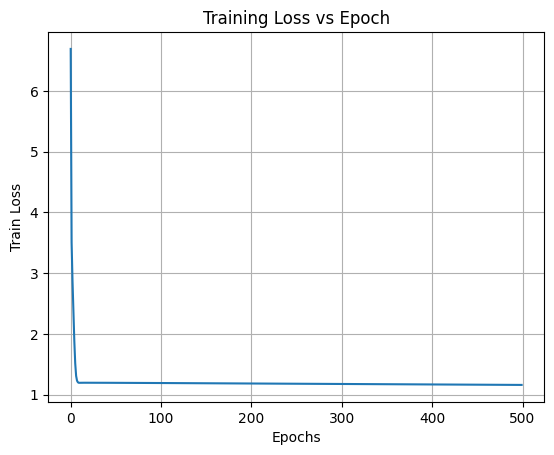

In [2]:
import csv
import numpy as np
import random
import matplotlib.pyplot as plt

# Set seed value for reproducibility
random.seed(42)
np.random.seed(42)

def read_file():
    """Reading the CSV file"""
    with open('diabetes.csv', mode='r', newline='') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)

        # Optionally, read the header
        header = next(csv_reader)
        print("Header:", header)

        # Read and print each row
        for row in csv_reader:
            print(row)

def load_file():
    """Loading CSV into a numpy array"""
    data = np.genfromtxt('diabetes.csv', delimiter=',', skip_header=1)

    # Split the data into X and Y
    X = data[:, :-1]  # All columns except the last
    Y = data[:, -1]   # The last column

    return X, Y

def sigmoid(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def split_data(X, Y):
    """Randomly split the dataset into train, validation, and test sets"""
    dataset = list(zip(X, Y))
    random.shuffle(dataset)
    X, Y = zip(*dataset)
    X = np.array(X)
    Y = np.array(Y)

    n_train = int(len(X) * 0.7)
    n_val = int(len(X) * 0.15)

    X_train = X[:n_train]
    Y_train = Y[:n_train]
    X_val = X[n_train:n_train + n_val]
    Y_val = Y[n_train:n_train + n_val]
    X_test = X[n_train + n_val:]
    Y_test = Y[n_train + n_val:]

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

def train_logistic_regression(X_train, Y_train, lr, max_iter):
    """Train logistic regression model"""
    N_train = X_train.shape[0]
    n_features = X_train.shape[1]

    # Add bias term to X
    X_train = np.concatenate((X_train, np.ones((N_train, 1))), axis=1)

    # Randomly initialize weights
    Theta = np.random.rand(n_features + 1)

    history = []

    for itr in range(max_iter):
        TJ = 0  # total cost
        for i in range(N_train):
            X_i = X_train[i]
            y_i = Y_train[i]
            z = np.dot(X_i, Theta)
            h = sigmoid(z)

            # Clipping to avoid log(0)
            h = np.clip(h, 1e-15, 1 - 1e-15)  # Preventing h from being exactly 0 or 1

            J = -y_i * np.log(h) - (1 - y_i) * np.log(1 - h)  # Cost
            TJ += J

            # Gradient
            dv = X_i * (h - y_i)
            Theta -= lr * dv

        TJ /= N_train  # Average loss
        history.append(TJ)

    return Theta, history

def validate_model(X_val, Y_val, Theta):
    """Validate the model and calculate accuracy"""
    X_val = np.concatenate((X_val, np.ones((X_val.shape[0], 1))), axis=1)
    correct = 0

    for i in range(X_val.shape[0]):
        z = np.dot(X_val[i], Theta)
        h = sigmoid(z)
        h = 1 if h >= 0.5 else 0

        if h == Y_val[i]:
            correct += 1

    val_acc = correct * 100 / X_val.shape[0]
    return val_acc

def test_model(X_test, Y_test, Theta):
    """Test the model and calculate accuracy"""
    X_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
    correct = 0

    for i in range(X_test.shape[0]):
        z = np.dot(X_test[i], Theta)
        h = sigmoid(z)
        h = 1 if h >= 0.5 else 0

        if h == Y_test[i]:
            correct += 1

    test_acc = correct * 100 / X_test.shape[0]
    return test_acc

def plot_training_loss(history):
    """Plot the training loss"""
    plt.plot(history)
    plt.title('Training Loss vs Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Train Loss')
    plt.grid()
    plt.show()

if __name__ == '__main__':
    X, Y = load_file()
    X_train, Y_train, X_val, Y_val, X_test, Y_test = split_data(X, Y)

    learning_rates = [0.1, 0.01, 0.001, 0.0001]
    results = []

    for lr in learning_rates:
        Theta, history = train_logistic_regression(X_train, Y_train, lr, max_iter=500)
        val_acc = validate_model(X_val, Y_val, Theta)
        results.append((lr, val_acc))
        print(f"Learning rate: {lr}, Validation Accuracy: {val_acc:.2f}%")

    # Determine the best learning rate
    best_lr, max_val_acc = max(results, key=lambda x: x[1])
    print(f"\nChosen lr: {best_lr}, Maximum Validation Accuracy: {max_val_acc:.2f}%")

    # Calculate test accuracy with the best learning rate
    Theta_best, _ = train_logistic_regression(X_train, Y_train, best_lr, max_iter=500)
    test_acc = test_model(X_test, Y_test, Theta_best)
    print(f"Test Accuracy: {test_acc:.2f}% (lr = {best_lr})")

    # Plot the training loss
    plot_training_loss(history)
